In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [123]:
data = pd.read_csv('Daily_Gold_Price_on_World.csv')
data

,Date,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Chinese renmimbi (CNY),Turkish lira (TRY),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Vietnamese dong (VND),Egyptian pound (EGP),Korean won (KRW),Russian ruble (RUB),South African rand (ZAR),Australian dollar (AUD)
0,1979-01-01,226.00,137.06,0.00,110.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1979-01-02,226.80,137.29,43164.91,111.45,263.74,359.62,1792.85,0.00,0.00,735.60,138160.45,851.29,4454.55,0.00,0.00,107470.04,0.00,194.56,193.61
2,1979-01-03,218.60,134.01,43717.90,107.98,264.39,365.87,1802.15,0.00,0.00,739.42,138877.01,855.71,4477.66,0.00,0.00,108027.43,0.00,192.23,192.97
3,1979-01-04,223.15,136.79,43674.89,110.66,264.14,366.38,1811.74,0.00,0.00,743.36,139616.26,860.26,4501.49,0.00,0.00,108602.47,0.00,193.01,194.55
4,1979-01-05,225.50,138.35,44582.47,111.63,268.39,373.72,1843.57,0.00,0.00,756.42,142069.10,875.38,4580.57,0.00,0.00,110510.44,0.00,196.40,197.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,2022-04-04,1930.30,1755.38,236896.07,1471.77,2406.99,1784.85,145834.17,12275.16,28386.99,7241.33,27708492.05,7090.09,64694.01,44102530.37,35208.67,2344349.41,162869.07,28141.36,2558.38
11286,2022-04-05,1944.05,1777.25,239691.65,1480.56,2418.11,1804.56,146459.87,12362.60,28616.42,7292.71,27892258.08,7140.59,64955.57,44470144.87,35459.47,2357743.90,162328.18,28373.41,2549.74
11287,2022-04-06,1930.15,1767.62,238846.40,1474.58,2412.88,1800.15,146223.33,12283.96,28452.34,7239.99,27711162.15,7089.54,64491.13,44137702.89,35341.04,2351598.13,160684.98,28274.28,2561.24
11288,2022-04-07,1932.40,1770.98,239472.66,1478.90,2431.83,1803.41,146780.27,12297.02,28489.85,7247.85,27747330.20,7097.80,64745.06,44176594.17,35440.21,2356851.54,152321.42,28536.72,2585.32


In [124]:
gold_usd=data[["US dollar (USD)","Euro (EUR)"]]
gold_usd

,US dollar (USD),Euro (EUR)
0,226.00,137.06
1,226.80,137.29
2,218.60,134.01
3,223.15,136.79
4,225.50,138.35
...,...,...
11285,1930.30,1755.38
11286,1944.05,1777.25
11287,1930.15,1767.62
11288,1932.40,1770.98


In [125]:
gold_usd["USDchange"]=(gold_usd["US dollar (USD)"].pct_change())*100
gold_usd["EUR change"]=(gold_usd["Euro (EUR)"].pct_change())*100
gold_usd=gold_usd.dropna()
gold_usd.head()

,US dollar (USD),Euro (EUR),USDchange,EUR change
1,226.80,137.29,0.353982,0.167810
2,218.60,134.01,-3.615520,-2.389103
3,223.15,136.79,2.081427,2.074472
4,225.50,138.35,1.053103,1.140434
5,223.10,136.38,-1.064302,-1.423925


# Split data

In [126]:
from sklearn.model_selection import train_test_split
X=gold_usd.index.to_frame()
y=gold_usd["US dollar (USD)"]
z=gold_usd["Euro (EUR)"]
X_train, X_test, y_train, y_test,Z_train, Z_test = train_test_split(
     X, y,z, test_size=0.30)

# SVM Algorithm

In [127]:
from sklearn.svm import SVR
regressor = SVR(C=15,epsilon=.05,kernel="rbf")
regressor.fit(X_train, y_train)

SVR(C=15, epsilon=0.05)

In [128]:
regressor1 = SVR(C=15,epsilon=.05,kernel="rbf")
regressor1.fit(X_train,Z_train)

SVR(C=15, epsilon=0.05)

In [129]:
regressor.score(X_train, y_train)

0.9023700124790843

In [130]:
regressor1.score(X_train,Z_train)

0.9217842453514263

In [131]:
gold_usd["USD_Prediction_SVR"]=regressor.predict(gold_usd.index.to_frame())

In [132]:
gold_usd["EUR_Prediction_SVR"]=regressor1.predict(gold_usd.index.to_frame())

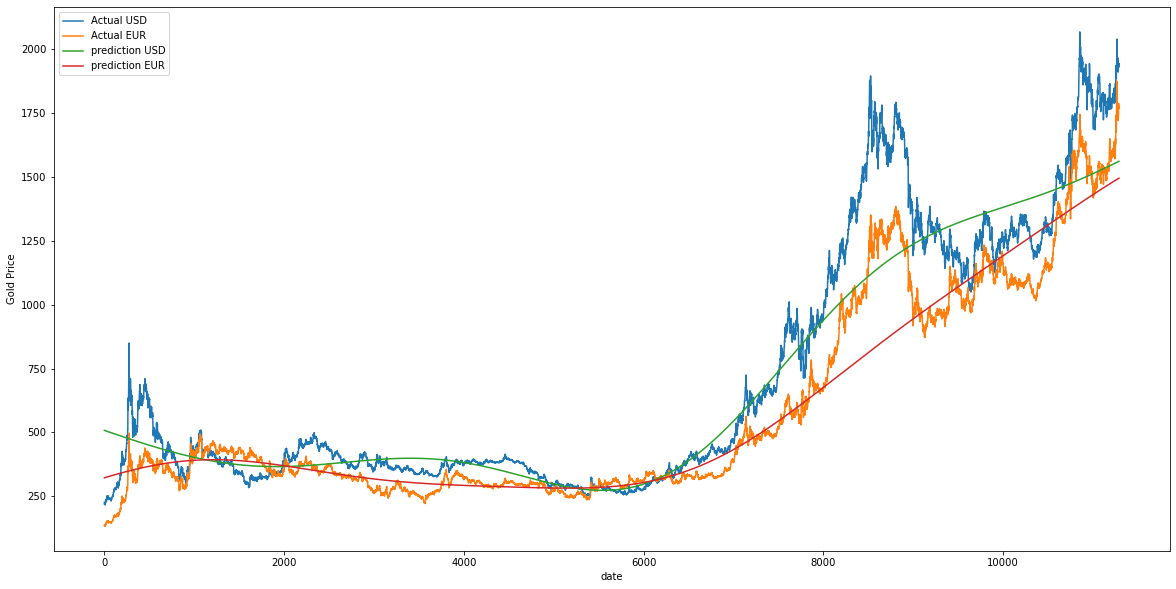

In [133]:
plt.figure(figsize=(20,10))
plt.xlabel("date")
plt.ylabel("Gold Price")
plt.plot(gold_usd["US dollar (USD)"],label="Actual USD")
plt.plot(gold_usd["Euro (EUR)"],label="Actual EUR")
plt.plot(gold_usd["USD_Prediction_SVR"],label="prediction USD")
plt.plot(gold_usd["EUR_Prediction_SVR"],label="prediction EUR")


plt.legend()

In [134]:
today=np.datetime64("2022-08-06","ns")
regressor.predict([[today]])   #USD

array([903.14161738])

In [135]:
today1=np.datetime64("2022-08-06","ns")
regressor1.predict([[today1]])          #EUR

array([714.73283909])

# Random forest

In [136]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9994151478605736

In [137]:
gold_usd["USD_Prediction_RF"]=model.predict(gold_usd.index.to_frame())

In [138]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(n_estimators=1)
model1.fit(X_train,Z_train)
model1.score(X_test,Z_test)

0.9993916761172786

In [139]:
gold_usd["EUR_Prediction_RF"]=model1.predict(gold_usd.index.to_frame())

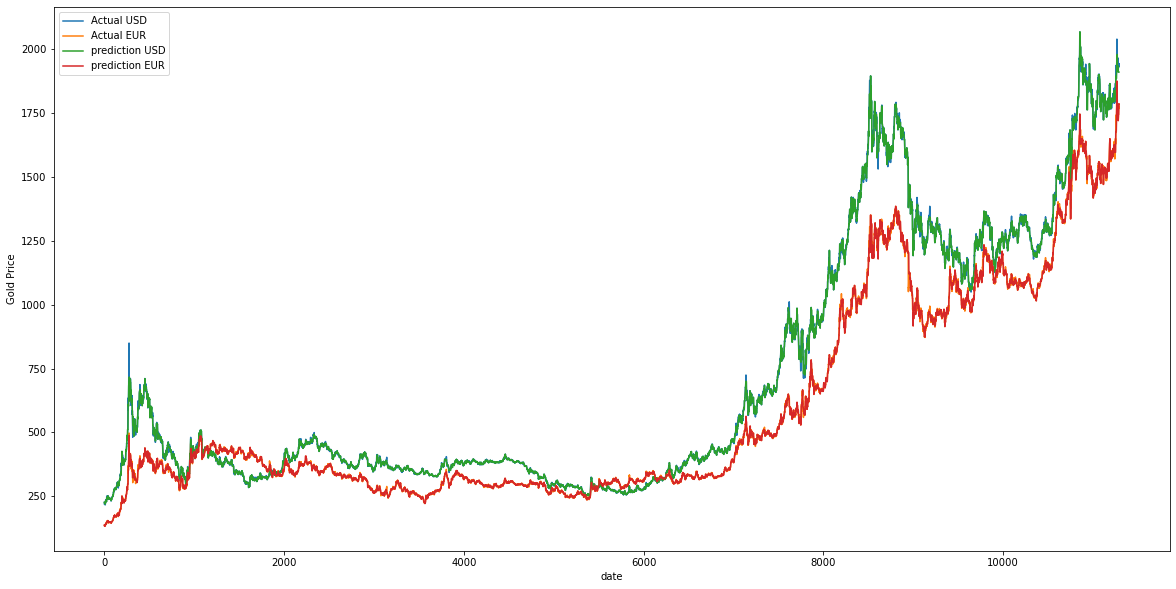

In [140]:
plt.figure(figsize=(20,10))
plt.xlabel("date")
plt.ylabel("Gold Price")
plt.plot(gold_usd.index,gold_usd["US dollar (USD)"],label="Actual USD")
plt.plot(gold_usd.index,gold_usd["Euro (EUR)"],label="Actual EUR")
plt.plot(gold_usd.index,gold_usd["USD_Prediction_RF"],label="prediction USD")
plt.plot(gold_usd.index,gold_usd["EUR_Prediction_RF"],label="prediction EUR")


plt.legend()

In [141]:
today=np.datetime64("2022-08-06","ns")
model.predict([[today]])

array([1910.])

In [142]:
today1=np.datetime64("2022-08-06","ns")
model1.predict([[today1]])

array([1785.44])

# Linear regression

In [143]:
gold_usd['Time'] = np.arange(1,len(gold_usd.index)+1)
W = gold_usd.loc[:, ['Time']]  # features
e = gold_usd.loc[:, "US dollar (USD)"]
f = gold_usd.loc[:, "Euro (EUR)"]

In [144]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(W,e)

LinearRegression()

In [145]:
model2.score(W,e)

0.6361526300808464

In [146]:
model3=LinearRegression()
model3.fit(W,f)

LinearRegression()

In [147]:
model3.score(W,f)

0.6484265459944614

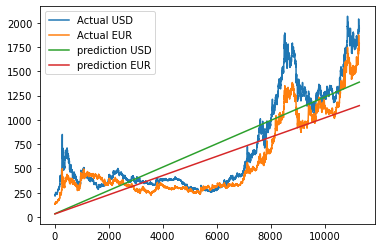

In [148]:
plt.plot(gold_usd.index,gold_usd["US dollar (USD)"],label="Actual USD")
plt.plot(gold_usd.index,gold_usd["Euro (EUR)"],label="Actual EUR")
plt.plot(gold_usd.index,model2.predict(W),label="prediction USD")
plt.plot(gold_usd.index,model3.predict(W),label="prediction EUR")
plt.legend()

In [149]:
gold_usd["USD_Prediction_LR"]=model2.predict(gold_usd.index.to_frame())

In [150]:
gold_usd["EUR_Prediction_LR"]=model3.predict(gold_usd.index.to_frame())

In [151]:
gold_usd.head()

,US dollar (USD),Euro (EUR),USDchange,EUR change,USD_Prediction_SVR,EUR_Prediction_SVR,USD_Prediction_RF,EUR_Prediction_RF,Time,USD_Prediction_LR,EUR_Prediction_LR
1,226.80,137.29,0.353982,0.167810,508.211597,323.046530,226.80,137.29,1,33.259787,31.508540
2,218.60,134.01,-3.615520,-2.389103,508.090694,323.151004,226.80,134.01,2,33.379872,31.607335
3,223.15,136.79,2.081427,2.074472,507.969798,323.255438,223.15,136.79,3,33.499957,31.706129
4,225.50,138.35,1.053103,1.140434,507.848910,323.359832,225.50,138.35,4,33.620041,31.804923
5,223.10,136.38,-1.064302,-1.423925,507.728029,323.464185,223.10,136.38,5,33.740126,31.903717


In [154]:
value=np.busday_count('1979-01-02', '2022-08-06')
model2.predict([[value]])

array([1398.98313595])

In [155]:
value1=np.busday_count('1979-01-02', '2022-08-06')
model3.predict([[value1]])

array([1155.09399956])

# Actual Gold Price Today (2022-08-06) is 1775 USD & 1742 EUR
